In [2]:
load("simpler.RData")

In [3]:
library(brms)
library(lavaan)
library(blavaan)

Loading required package: Rcpp

Loading 'brms' package (version 2.18.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


This is lavaan 0.6-14
lavaan is FREE software! Please report any bugs.

This is blavaan 0.4-7

On multicore systems, we suggest use of future::plan("multicore") or
  future::plan("multisession") for faster post-MCMC computations.



# Full model, but everything is linear

In [2]:
N <- 100
M <- 2
K <- 4
J <- 3

mu <- 0
al <- matrix(c(-1, 1), ncol = 1)
Z <- matrix(rnorm(M*N), ncol = N)
ep_x <- matrix(rnorm(N, sd = 0.1), ncol = N)
X <- t(al) %*% Z + ep_x

U <- matrix(rnorm(K*N, sd = .2), ncol = N)
W <- sweep(U, 2, X, "+")

h_1 <- function(x) -x
h_2 <- function(x) 2*x
f <- function(x) 3*x
eta <- rnorm(N)
S <- f(X) + h_1(Z[1, ]) + h_2(Z[2, ]) + eta
S <- matrix(S, ncol = N)

beta0 <- matrix(rep(0, J*N), ncol = N)
beta1 <- matrix(rep(2, J), ncol = 1)
ep_y <- matrix(rnorm(J * N, sd = 0.1), ncol = N)
Y <- beta0 + beta1 %*% S + ep_y


In [3]:
# install.packages("ggpubr")
# library(ggpubr)

Installing package into ‘/Users/nescoba/Library/R/arm64/4.2/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘tidyr’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’





The downloaded binary packages are in
	/var/folders/gb/chvh9g355qqf4q5rw11d1m55xdk3f1/T//Rtmp2xr7Cz/downloaded_packages


Loading required package: ggplot2



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


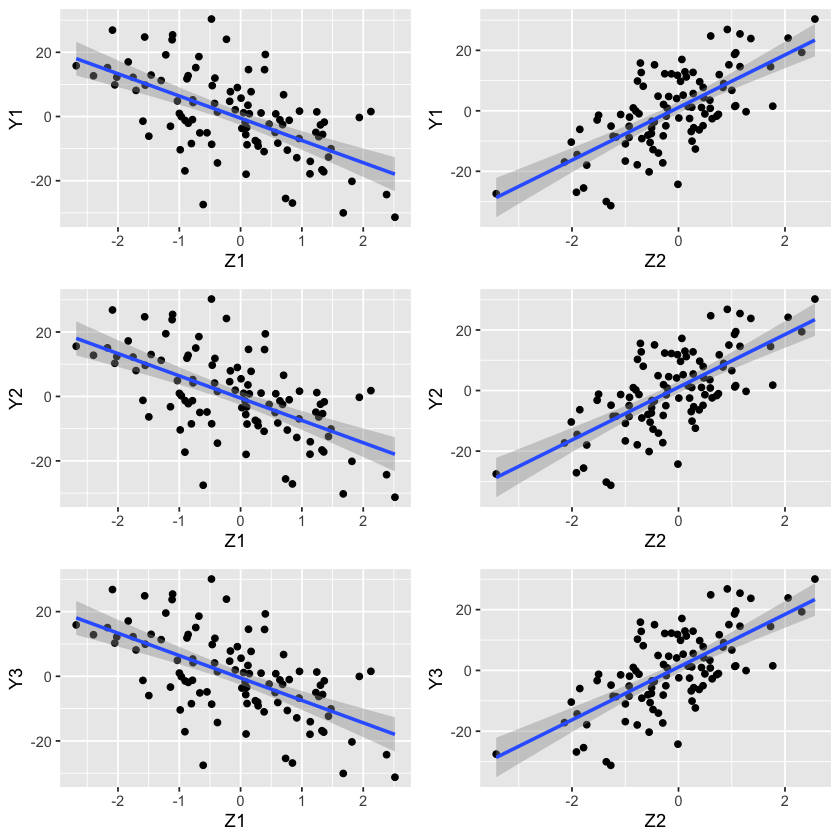

In [5]:
data <- as.data.frame(t(rbind(Z,W,Y)))
names(data) <- c("Z1", "Z2", "W1", "W2", "W3", "W4", "Y1", "Y2", "Y3")

p1 <- ggplot(data, aes(x = Z1, y = Y1)) + geom_point() + geom_smooth(method = "lm")
p2 <- ggplot(data, aes(x = Z2, y = Y1)) + geom_point() + geom_smooth(method = "lm")
p3 <- ggplot(data, aes(x = Z1, y = Y2)) + geom_point() + geom_smooth(method = "lm")
p4 <- ggplot(data, aes(x = Z2, y = Y2)) + geom_point() + geom_smooth(method = "lm")
p5 <- ggplot(data, aes(x = Z1, y = Y3)) + geom_point() + geom_smooth(method = "lm")
p6 <- ggplot(data, aes(x = Z2, y = Y3)) + geom_point() + geom_smooth(method = "lm")

# Draw the plots in a 2x2 grid
ggarrange(p1, p2, p3, p4, p5, p6, ncol = 2, nrow = 3)


## lavaan

In [6]:
mod <- '
Xl =~ Z1 + Z2
W1 ~ 1*Xl
W2 ~ 1*Xl
W3 ~ 1*Xl
W4 ~ 1*Xl
Sl =~ Xl + Z1 + Z2
Y1 ~ Sl
Y2 ~ Sl
Y3 ~ Sl
'

fit_lavaan <- sem(mod, data = data)
parameterEstimates(fit_lavaan)

Warning message in lavaan::lavaan(model = mod, data = data, model.type = "sem", :
“lavaan WARNING:
    the optimizer warns that a solution has NOT been found!”


lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xl,=~,Z1,1.000000e+00,0,NA,NA,1,1
Xl,=~,Z2,1.032150e+02,NA,NA,NA,NA,NA
W1,~,Xl,1.000000e+00,0,NA,NA,1,1
W2,~,Xl,1.000000e+00,0,NA,NA,1,1
W3,~,Xl,1.000000e+00,0,NA,NA,1,1
W4,~,Xl,1.000000e+00,0,NA,NA,1,1
Sl,=~,Xl,1.000000e+00,0,NA,NA,1,1
Sl,=~,Z1,-1.987109e+00,NA,NA,NA,NA,NA
Sl,=~,Z2,-1.093298e+02,NA,NA,NA,NA,NA


In [7]:
mod <- '
Xl =~ Z1 + Z2
W1 ~ Xl
W2 ~ Xl
W3 ~ Xl
W4 ~ Xl
Sl =~ Xl + Z1 + Z2
Y1 ~ Sl
Y2 ~ Sl
Y3 ~ Sl
'

fit_lavaan <- sem(mod, data = data)
parameterEstimates(fit_lavaan)

Warning message in lavaan::lavaan(model = mod, data = data, model.type = "sem", :
“lavaan WARNING:
    the optimizer warns that a solution has NOT been found!”


lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xl,=~,Z1,1.000000e+00,0,NA,NA,1,1
Xl,=~,Z2,1.171407e+02,NA,NA,NA,NA,NA
W1,~,Xl,1.532627e-02,NA,NA,NA,NA,NA
W2,~,Xl,1.532891e-02,NA,NA,NA,NA,NA
W3,~,Xl,1.578915e-02,NA,NA,NA,NA,NA
W4,~,Xl,1.556680e-02,NA,NA,NA,NA,NA
Sl,=~,Xl,1.000000e+00,0,NA,NA,1,1
Sl,=~,Z1,-1.009243e+00,NA,NA,NA,NA,NA
Sl,=~,Z2,-1.171328e+02,NA,NA,NA,NA,NA


In [8]:
mod <- '
Xl =~ 1*W1 + 1*W2 + 1*W3 + 1*W4
Xl ~ Z1 + Z2
Sl =~ Y1 + Y2 + Y3
Sl ~ Xl + Z1 + Z2
'

fit_lavaan <- sem(mod, data = data)
parameterEstimates(fit_lavaan)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xl,=~,W1,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W2,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W3,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W4,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,~,Z1,-1.00286832,0.013152607,-76.2486355,0.000000e+00,-1.028646955,-0.97708968
Xl,~,Z2,0.98852212,0.014483697,68.2506775,0.000000e+00,0.960134595,1.01690964
Sl,=~,Y1,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Sl,=~,Y2,1.00053296,0.001202583,831.9868409,0.000000e+00,0.998175943,1.00288998
Sl,=~,Y3,0.99959908,0.001137874,878.4798642,0.000000e+00,0.997368893,1.00182928


In [19]:
mod <- '
Xl =~ 1*W1 + 1*W2 + 1*W3 + 1*W4
Xl ~ Z1 + Z2
Sl =~ Y1 + Y2 + Y3
Sl ~ Xl + Z1 + Z2
'

fit_lavaan <- sem(mod, data = data, std.lv = TRUE)
parameterEstimates(fit_lavaan)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xl,=~,W1,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W2,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W3,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,=~,W4,1.00000000,0.000000000,NA,NA,1.000000000,1.00000000
Xl,~,Z1,-1.00119224,0.090273224,-11.090689,0.000000e+00,-1.178124510,-0.82425998
Xl,~,Z2,0.98698660,0.099409191,9.928525,0.000000e+00,0.792148163,1.18182503
Sl,=~,Y1,1.99961944,0.146840971,13.617585,0.000000e+00,1.711816428,2.28742246
Sl,=~,Y2,2.00068516,0.146920353,13.617481,0.000000e+00,1.712726562,2.28864376
Sl,=~,Y3,1.99881777,0.146781391,13.617651,0.000000e+00,1.711131526,2.28650401


## blavaan

In [11]:
fit_blavaan <- bsem(mod, data = data)



SAMPLING FOR MODEL 'stanmarg' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000136 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.36 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 1500 [  0%]  (Warmup)
Chain 1: Iteration:  150 / 1500 [ 10%]  (Warmup)
Chain 1: Iteration:  300 / 1500 [ 20%]  (Warmup)
Chain 1: Iteration:  450 / 1500 [ 30%]  (Warmup)
Chain 1: Iteration:  501 / 1500 [ 33%]  (Sampling)
Chain 1: Iteration:  650 / 1500 [ 43%]  (Sampling)
Chain 1: Iteration:  800 / 1500 [ 53%]  (Sampling)
Chain 1: Iteration:  950 / 1500 [ 63%]  (Sampling)
Chain 1: Iteration: 1100 / 1500 [ 73%]  (Sampling)
Chain 1: Iteration: 1250 / 1500 [ 83%]  (Sampling)
Chain 1: Iteration: 1400 / 1500 [ 93%]  (Sampling)
Chain 1: Iteration: 1500 / 1500 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 6.21845 seconds (Warm-up)
Chain 1:                5.99173 seconds (Sampling)
Chain 1:             

In [18]:
as.data.frame(coef(fit_blavaan))

,coef(fit_blavaan)
,<lvn.vctr>
Xl~Z1,-1.00304396
Xl~Z2,0.98841791
Sl=~Y2,1.00055819
Sl=~Y3,0.99963155
Sl~Xl,7.16999526
Sl~Z1,-1.19448740
Sl~Z2,3.06984917
W1~~W1,0.03969454
W2~~W2,0.02481112


In [20]:
fit_blavaan <- bsem(mod, data = data, std.lv = TRUE)


SAMPLING FOR MODEL 'stanmarg' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000143 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.43 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 1500 [  0%]  (Warmup)
Chain 1: Iteration:  150 / 1500 [ 10%]  (Warmup)
Chain 1: Iteration:  300 / 1500 [ 20%]  (Warmup)
Chain 1: Iteration:  450 / 1500 [ 30%]  (Warmup)
Chain 1: Iteration:  501 / 1500 [ 33%]  (Sampling)
Chain 1: Iteration:  650 / 1500 [ 43%]  (Sampling)
Chain 1: Iteration:  800 / 1500 [ 53%]  (Sampling)
Chain 1: Iteration:  950 / 1500 [ 63%]  (Sampling)
Chain 1: Iteration: 1100 / 1500 [ 73%]  (Sampling)
Chain 1: Iteration: 1250 / 1500 [ 83%]  (Sampling)
Chain 1: Iteration: 1400 / 1500 [ 93%]  (Sampling)
Chain 1: Iteration: 1500 / 1500 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 16.6488 seconds (Warm-up)
Chain 1:                38.146 seconds (Sampling)
Chain 1:              

In [21]:
as.data.frame(coef(fit_blavaan))

,coef(fit_blavaan)
,<lvn.vctr>
Xl~Z1,-0.99863618
Xl~Z2,0.98506752
Sl=~Y1,2.04208777
Sl=~Y2,2.04318000
Sl=~Y3,2.04127626
Sl~Xl,2.15178510
Sl~Z1,-1.97480586
Sl~Z2,2.88283396
W1~~W1,0.03848669


## BRMS

In [23]:
data$S <- as.numeric(NA)
data$X <- as.numeric(NA)

bf3 <- bf(X | mi() ~ Z1 + Z2)
bf4 <- bf(W1 ~ 0 + mi(X))
bf5 <- bf(W2 ~ 0 + mi(X))
bf6 <- bf(W3 ~ 0 + mi(X))
bf7 <- bf(W4 ~ 0 + mi(X))
bf11 <- bf(S | mi() ~ mi(X) + Z1 + Z2)
bf12 <- bf(Y1 ~ 0 + mi(S))
bf13 <- bf(Y2 ~ 0 + mi(S))
bf14 <- bf(Y3 ~ 0 + mi(S))

model <- brm( bf3 + bf4 + bf5 + bf6 + bf7 + bf11 + bf12 + bf13 + bf14 +set_rescor(FALSE), 
data = data, family = gaussian(), 
iter = 2000, chains = 2, cores = 4, seed = 123,
prior = c(prior(normal(1, 0000.1), coef = miX, resp = W1), 
prior(normal(1, 0000.1), coef = miX, resp = W2),
prior(normal(1, 0000.1), coef = miX, resp = W3),
prior(normal(1, 0000.1), coef = miX, resp = W4)))

Compiling Stan program...

Start sampling

Warning message:
“There were 4 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.87, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [26]:
summary(model)$fixed

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”


,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X_Intercept,0.003084542,0.01553695,-0.02956128,0.03332462,1.001318,874.688908,953.67410
S_Intercept,0.093029839,0.21621186,-0.17557233,0.50902854,1.815043,2.957855,63.57961
X_Z1,-1.006982416,0.05309638,-1.12062099,-0.91136350,1.029501,61.448451,105.40626
X_Z2,0.992410654,0.05252627,0.90147101,1.10260046,1.030059,62.530361,109.29017
S_Z1,-0.283484619,1.27574271,-3.24565129,1.72784030,1.182582,16.107327,73.53495
S_Z2,0.644739962,1.71690554,-1.62359380,4.32165683,1.488520,3.841787,71.93306
W1_miX,0.989412013,0.05114776,0.88982396,1.08380592,1.026233,63.802617,102.03972
W2_miX,0.990293834,0.05041331,0.89211980,1.08907415,1.029313,62.849806,95.22973
W3_miX,1.017637548,0.05258569,0.91264564,1.12137789,1.026898,63.203790,120.36323


In [28]:
bf3 <- bf(X | mi(W1 + W2 + W3 + W4) ~ Z1 + Z2)
bf11 <- bf(S | mi() ~ mi(X) + Z1 + Z2)
bf12 <- bf(Y1 ~ 0 + mi(S))
bf13 <- bf(Y2 ~ 0 + mi(S))
bf14 <- bf(Y3 ~ 0 + mi(S))

model <- brm(bf3 + bf11 + bf12 + bf13 + bf14 +set_rescor(FALSE), 
data = data, family = gaussian(), 
iter = 2000, chains = 2, cores = 4, seed = 123)

ERROR: Error: Measurement error should be positive.


In [4]:
bf1 <- bf(cbind(W1, W2, W3, W4) ~ 0 + mi(X))
bf2 <- bf(X | mi() ~ Z1 + Z2)
bf3 <- bf(S | mi() ~ mi(X) + Z1 + Z2)
bf4 <- bf(cbind(Y1, Y2, Y3) ~ 0 + mi(S))

model <- brm(bf1 + bf2 + bf3 + bf4 +set_rescor(FALSE),
data = data, family = gaussian(),
iter = 2000, chains = 2, cores = 4, seed = 123)

Compiling Stan program...

Start sampling



Error in eval(expr, envir, enclos) : 
  Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=Y_cbindW1W2W3W4; dims declared=(100); dims found=(100,4) (in 'anon_model', line 7, column 2 to column 42)


failed to create the sampler; sampling not done



In [29]:
save(list = ls(), file = "simpler.RData")